## 🧪 Exploratory Data Analysis (EDA)

### 🔧 Step 1: Load and Inspect the Data

In [1]:
import pandas as pd


df = pd.read_csv('../dataset/WHO-COVID-19-global-daily-data.csv')
df.head()

Date_reported Country_code     Country WHO_region  New_cases  \
0    2020-01-04           AI    Anguilla        AMR        NaN   
1    2020-01-04           AZ  Azerbaijan        EUR        NaN   
2    2020-01-04           BD  Bangladesh       SEAR        0.0   
3    2020-01-04           BB    Barbados        AMR        NaN   
4    2020-01-04           BR      Brazil        AMR        NaN   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2                 0         0.0                  0  
3                 0         NaN                  0  
4                 0         NaN                  0

### 🔍 Step 2: Understand the Columns

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459120 entries, 0 to 459119
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      459120 non-null  object 
 1   Country_code       457207 non-null  object 
 2   Country            459120 non-null  object 
 3   WHO_region         459120 non-null  object 
 4   New_cases          208319 non-null  float64
 5   Cumulative_cases   459120 non-null  int64  
 6   New_deaths         153101 non-null  float64
 7   Cumulative_deaths  459120 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 28.0+ MB


In [3]:
df.describe(include='all')

Date_reported Country_code   Country WHO_region     New_cases  \
count         459120       457207    459120     459120  2.083190e+05   
unique          1913          239       240          7           NaN   
top       2020-01-04           AI  Anguilla        EUR           NaN   
freq             240         1913      1913     118606           NaN   
mean             NaN          NaN       NaN        NaN  3.733176e+03   
std              NaN          NaN       NaN        NaN  4.879684e+04   
min              NaN          NaN       NaN        NaN -6.507900e+04   
25%              NaN          NaN       NaN        NaN  3.000000e+00   
50%              NaN          NaN       NaN        NaN  6.200000e+01   
75%              NaN          NaN       NaN        NaN  6.890000e+02   
max              NaN          NaN       NaN        NaN  6.966046e+06   

        Cumulative_cases     New_deaths  Cumulative_deaths  
count       4.591200e+05  153101.000000       4.591200e+05  
unique               NaN            NaN                NaN  
top                  NaN            NaN                NaN  
freq                 NaN            NaN                NaN  
mean        1.965723e+06      46.330638       2.115524e+04  
std         8.303399e+06     243.007709       8.526718e+04  
min         0.000000e+00   -3520.000000       0.000000e+00  
25%         5.900000e+03       0.000000       3.600000e+01  
50%         5.444450e+04       2.000000       6.710000e+02  
75%         6.319058e+05      15.000000       7.583000e+03  
max         1.034368e+08   44047.000000       1.221449e+06

### ❓ Step 3: Check for Missing or Duplicated Data

In [4]:
df.isnull().sum()

Date_reported             0
Country_code           1913
Country                   0
WHO_region                0
New_cases            250801
Cumulative_cases          0
New_deaths           306019
Cumulative_deaths         0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(459120, 8)

### 🧼 Step 4: Data Cleaning

In [7]:
# Remove duplicate rows (if any)
df = df.drop_duplicates()

# Check again after removing duplicates
print("Remaining Duplicates:", df.duplicated().sum())

Remaining Duplicates: 0


In [8]:
# Drop rows where BOTH new cases and deaths are missing
df = df[~(df['New_cases'].isna() & df['New_deaths'].isna())]

# Fill missing new cases or deaths with 0 (assume no cases/deaths reported)
df['New_cases'] = df['New_cases'].fillna(0)
df['New_deaths'] = df['New_deaths'].fillna(0)

# Drop Country_code if not needed
df = df.drop(columns=['Country_code'])

# Final check
print("Missing values after handling:\n", df.isnull().sum())

Missing values after handling:
 Date_reported        0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64


In [9]:
df.shape

(209312, 7)

### 📊 Step 5: Visualize Total Global Deaths Over Time

In [10]:
import matplotlib.pyplot as plt

# convert to datetime
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

# global deaths
global_deaths = df.groupby('Date_reported')['New_deaths'].sum()

In [11]:
df

Date_reported          Country WHO_region  New_cases  Cumulative_cases  \
2         2020-01-04       Bangladesh       SEAR        0.0                 0   
8         2020-01-04     Cook Islands        WPR        0.0                 0   
15        2020-01-04            India       SEAR        0.0                 0   
22        2020-01-04            Nauru        WPR        0.0                 0   
28        2020-01-04  Solomon Islands        WPR        0.0                 0   
...              ...              ...        ...        ...               ...   
458104    2025-03-26            China        WPR        0.0          99381761   
458206    2025-03-27            China        WPR        0.0          99381761   
458583    2025-03-28            China        WPR        0.0          99381761   
458687    2025-03-29            China        WPR        0.0          99381761   
459063    2025-03-30            China        WPR        0.0          99381761   

        New_deaths  Cumulative_deaths  
2              0.0                  0  
8              0.0                  0  
15             0.0                  0  
22             0.0                  0  
28             0.0                  0  
...            ...                ...  
458104         0.0             122398  
458206         0.0             122398  
458583         0.0             122398  
458687         0.0             122398  
459063         0.0             122398  

[209312 rows x 7 columns]

In [12]:
global_deaths

Date_reported
2020-01-04    0.0
2020-01-05    3.0
2020-01-06    0.0
2020-01-07    0.0
2020-01-08    0.0
             ... 
2025-03-26    0.0
2025-03-27    0.0
2025-03-28    0.0
2025-03-29    0.0
2025-03-30    0.0
Name: New_deaths, Length: 1913, dtype: float64

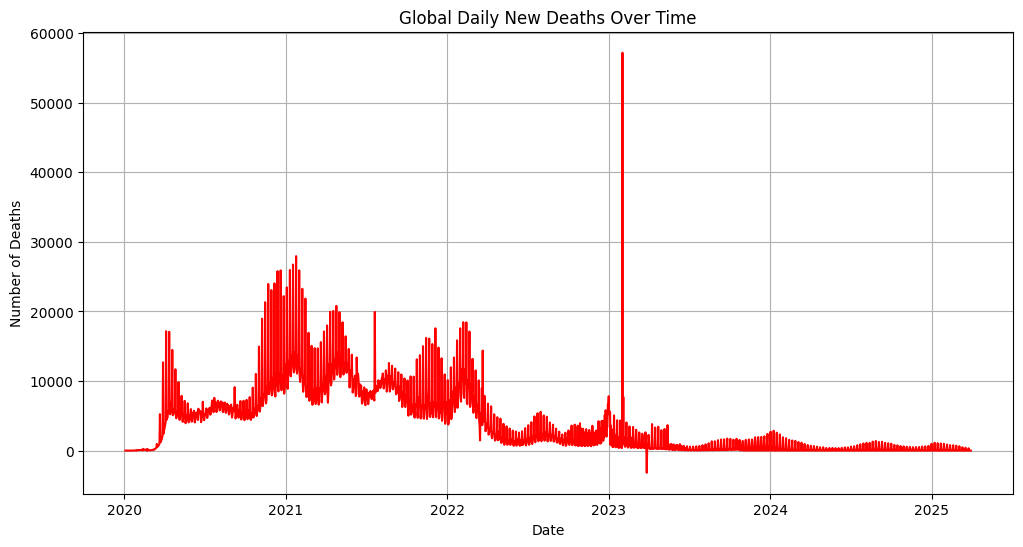

In [13]:
# plot
plt.figure(figsize=(12,6))
plt.plot(global_deaths.index, global_deaths.values, color='red')
plt.title('Global Daily New Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

### 🌍 Step 6: Top Countries by Cumulative Deaths

In [14]:
top_countries = df.groupby('Country')['Cumulative_deaths'].max().sort_values(ascending=False).head(10)
top_countries

Country
United States of America                                1221449
Brazil                                                   702689
India                                                    533662
Russian Federation                                       404290
Mexico                                                   334818
United Kingdom of Great Britain and Northern Ireland     232112
Peru                                                     220994
Italy                                                    198386
Germany                                                  174979
France                                                   168162
Name: Cumulative_deaths, dtype: int64

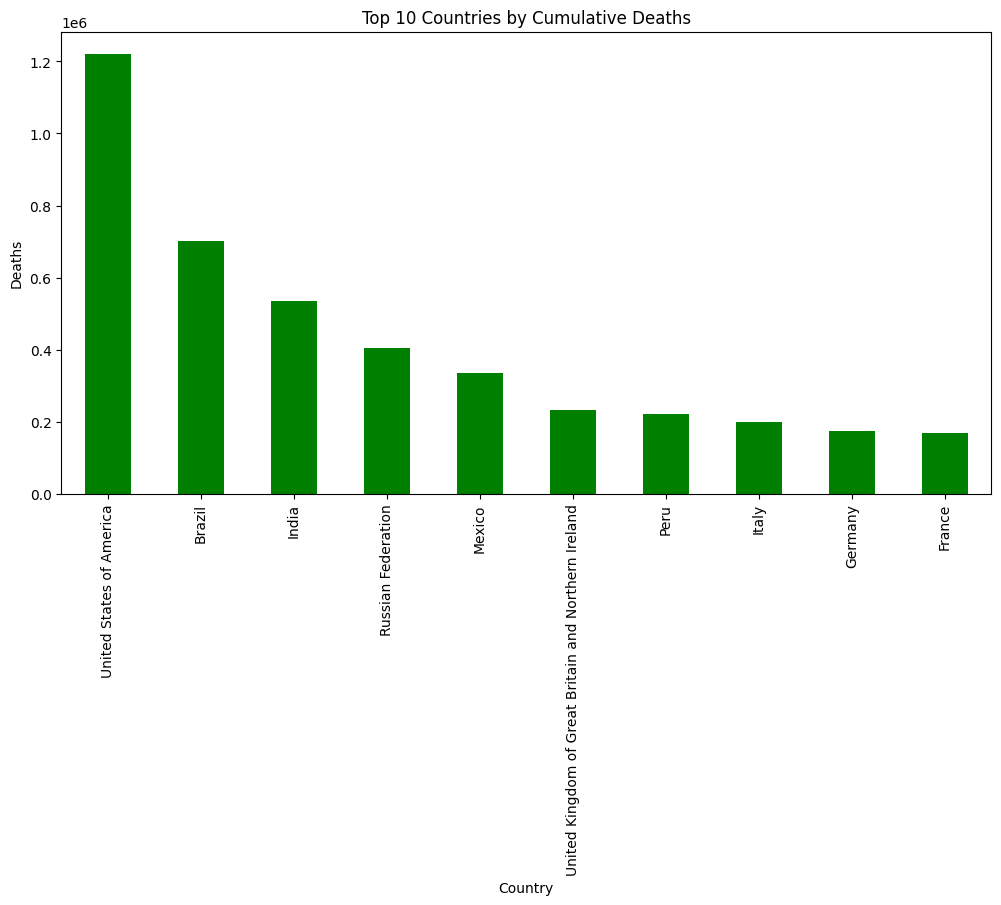

In [15]:
top_countries.plot(kind='bar', figsize=(12,6), color='green')
plt.title('Top 10 Countries by Cumulative Deaths')
plt.ylabel('Deaths')
plt.xticks(rotation=90)
plt.show()

### 🔍 Step 7: Country-Level Trends

#### 🇮🇳 India Daily Deaths Trend 

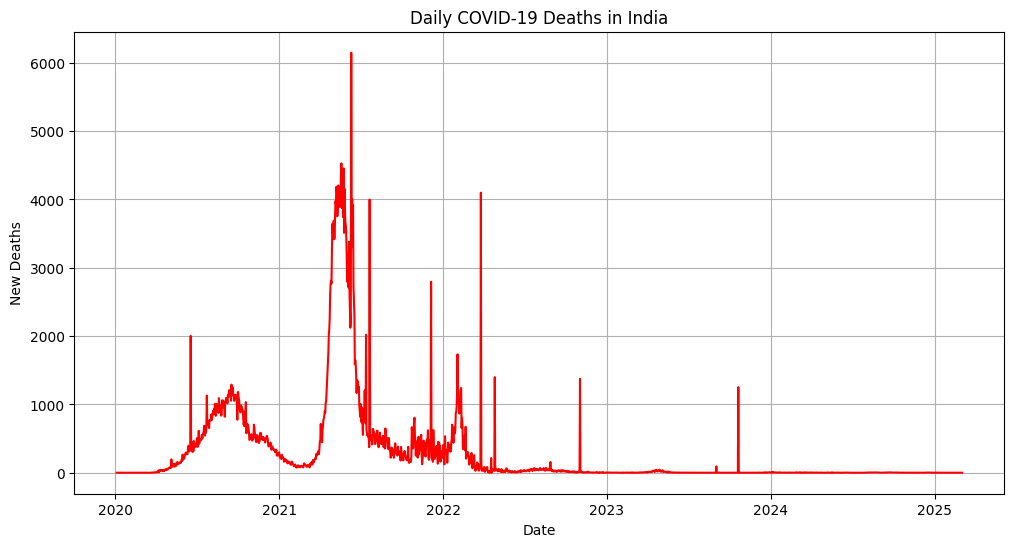

In [16]:
# filter for india 
india_data = df[df['Country'] == 'India']

# plot daily new deaths
plt.figure(figsize=(12,6))
plt.plot(india_data['Date_reported'], india_data['New_deaths'], label='India', color='red')
plt.title('Daily COVID-19 Deaths in India')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.grid(True)
plt.show()

#### 🌎 Compare Multiple Countries

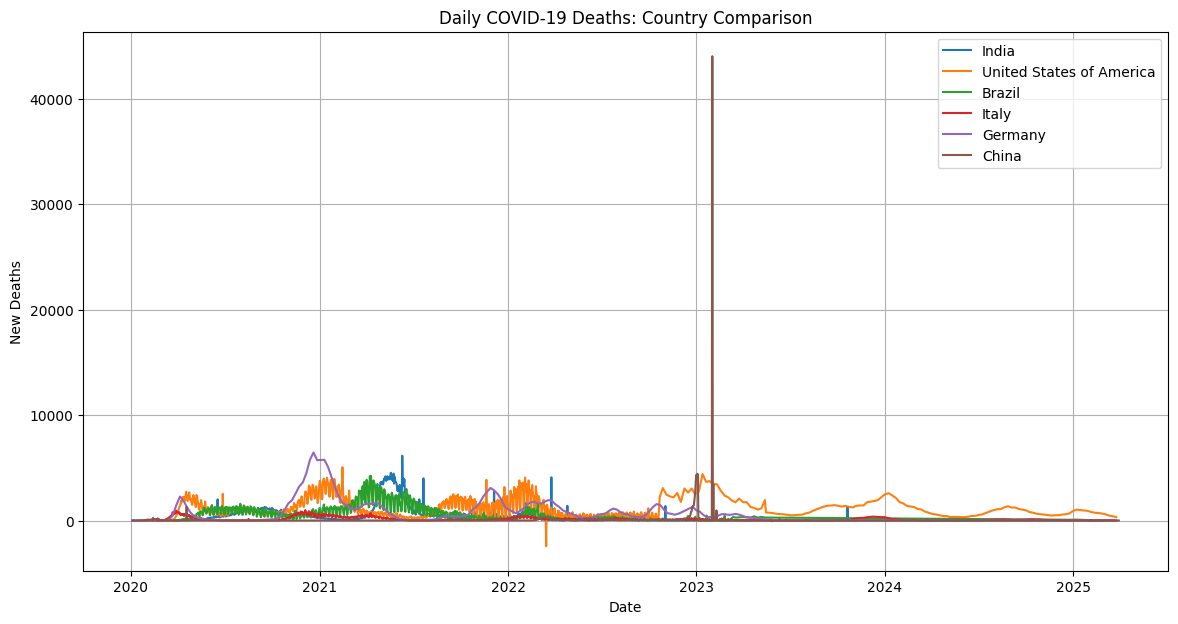

In [17]:
countries = ['India', 'United States of America', 'Brazil', 'Italy', 'Germany', 'China']
plt.figure(figsize=(14, 7))

for country in countries:
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Date_reported'], country_data['New_deaths'], label=country)

plt.title('Daily COVID-19 Deaths: Country Comparison')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.legend()
plt.grid(True)
plt.show()

### 🧠 Step 8: Compare Trends of New Deaths in Top 3 Countries

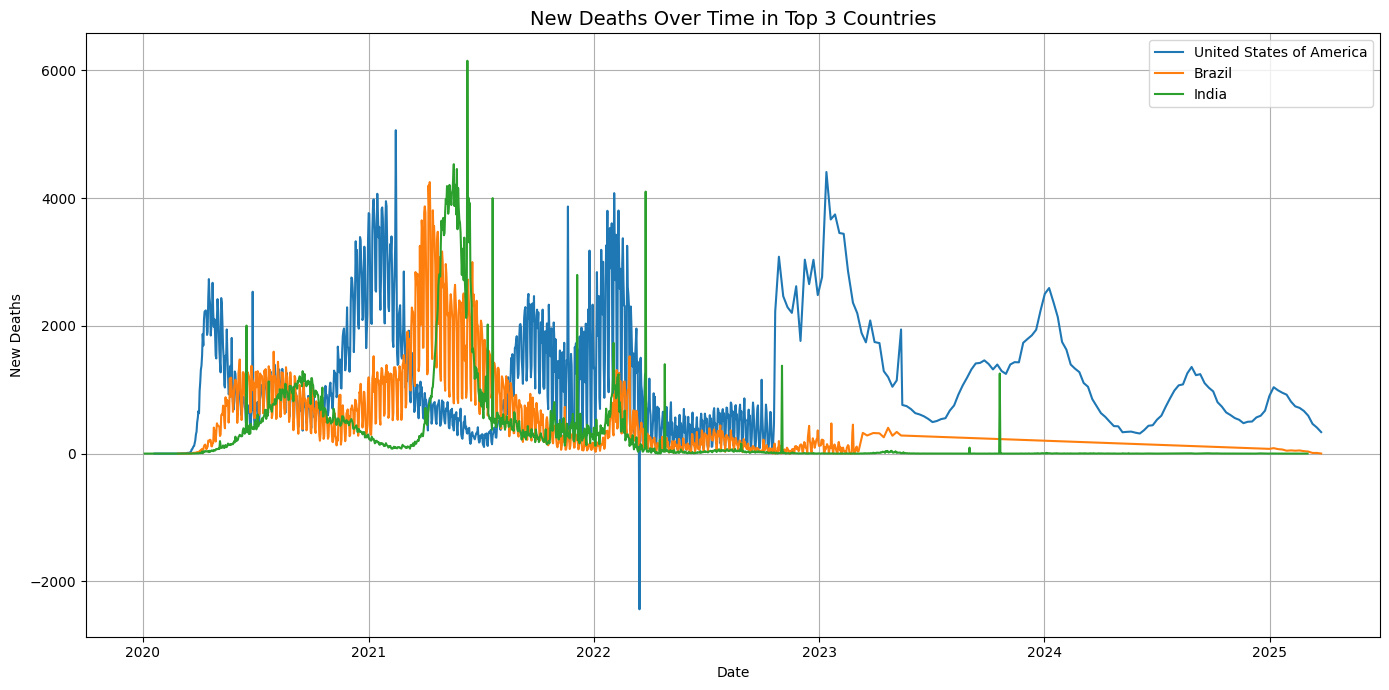

In [18]:
top_3 = top_countries.index[:3] # top 3 countries

# Filter the dataset for these countries
df_top3 = df[df['Country'].isin(top_3)]

# plotting
plt.figure(figsize=(14, 7))
for country in top_3:
    country_data = df_top3[df_top3['Country'] == country]
    plt.plot(country_data['Date_reported'], country_data['New_deaths'], label=country)
    # plt.plot(df_top3[df_top3['Country'] == country]['Date_reported'], df_top3[df_top3['Country'] == country]['New_deaths'], label=country)

plt.title("New Deaths Over Time in Top 3 Countries", fontsize=14)
plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 🌍 Step 9: WHO Region-Wise Total Deaths

In [19]:
df['WHO_region'].value_counts()

WHO_region
WPR      51020
EUR      48287
AMR      37098
AFR      35776
EMR      20332
SEAR     16760
OTHER       39
Name: count, dtype: int64

In [20]:
df['WHO_region'].unique()

array(['SEAR', 'WPR', 'EUR', 'AMR', 'EMR', 'OTHER', 'AFR'], dtype=object)

In [21]:
region_deaths = df.groupby('WHO_region')['Cumulative_deaths'].max().sort_values(ascending=False)
region_deaths

WHO_region
AMR      1221449
SEAR      533662
EUR       404290
EMR       146837
WPR       122398
AFR       102595
OTHER         13
Name: Cumulative_deaths, dtype: int64

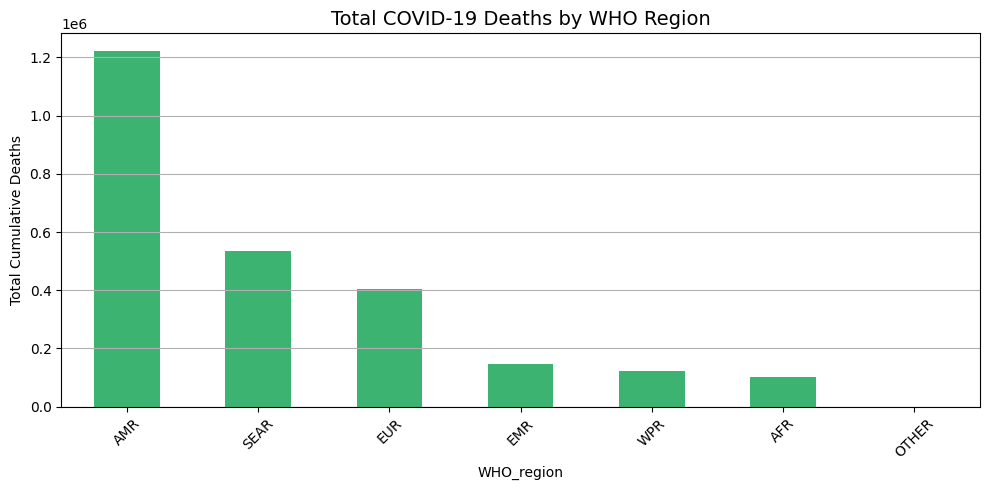

In [22]:
# plot
region_deaths.plot(kind='bar', figsize=(10, 5), color='mediumseagreen')
plt.title("Total COVID-19 Deaths by WHO Region", fontsize=14)
plt.ylabel("Total Cumulative Deaths")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 📈 Step 10: Trend of New Deaths Over Time — Per Region



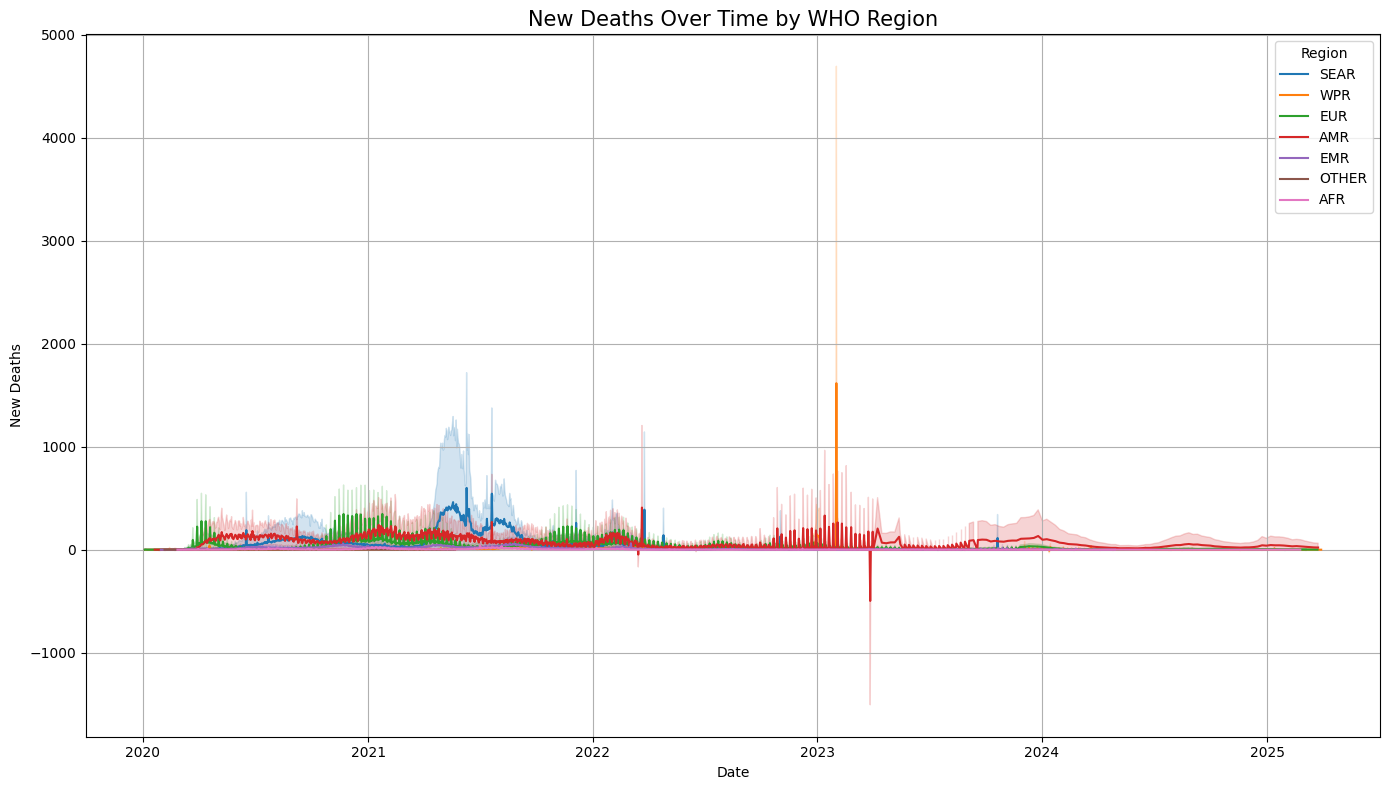

In [23]:
# Plotting new deaths over time per region
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Date_reported', y='New_deaths', hue='WHO_region')
plt.title("New Deaths Over Time by WHO Region", fontsize=15)
plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

### 📉 Step 11: 7-Day Moving Average of Global New Deaths

In [24]:
# create a new dataframe for global trend 
global_trend = df.groupby('Date_reported')['New_deaths'].sum().reset_index()
global_trend

Date_reported  New_deaths
0       2020-01-04         0.0
1       2020-01-05         3.0
2       2020-01-06         0.0
3       2020-01-07         0.0
4       2020-01-08         0.0
...            ...         ...
1908    2025-03-26         0.0
1909    2025-03-27         0.0
1910    2025-03-28         0.0
1911    2025-03-29         0.0
1912    2025-03-30         0.0

[1913 rows x 2 columns]

In [25]:
# calculate 7-day moving or rolling average
global_trend['7_day_avg'] = global_trend['New_deaths'].rolling(window=7).mean()
global_trend

Date_reported  New_deaths  7_day_avg
0       2020-01-04         0.0        NaN
1       2020-01-05         3.0        NaN
2       2020-01-06         0.0        NaN
3       2020-01-07         0.0        NaN
4       2020-01-08         0.0        NaN
...            ...         ...        ...
1908    2025-03-26         0.0  52.714286
1909    2025-03-27         0.0  52.714286
1910    2025-03-28         0.0  52.714286
1911    2025-03-29         0.0  52.714286
1912    2025-03-30         0.0  52.714286

[1913 rows x 3 columns]

In [26]:
global_trend.isnull().sum()

Date_reported    0
New_deaths       0
7_day_avg        6
dtype: int64

In [27]:
# clean it 
global_trend['7_day_avg'] = global_trend['7_day_avg'].fillna(0)
global_trend

Date_reported  New_deaths  7_day_avg
0       2020-01-04         0.0   0.000000
1       2020-01-05         3.0   0.000000
2       2020-01-06         0.0   0.000000
3       2020-01-07         0.0   0.000000
4       2020-01-08         0.0   0.000000
...            ...         ...        ...
1908    2025-03-26         0.0  52.714286
1909    2025-03-27         0.0  52.714286
1910    2025-03-28         0.0  52.714286
1911    2025-03-29         0.0  52.714286
1912    2025-03-30         0.0  52.714286

[1913 rows x 3 columns]

In [28]:
global_trend.isnull().sum()

Date_reported    0
New_deaths       0
7_day_avg        0
dtype: int64

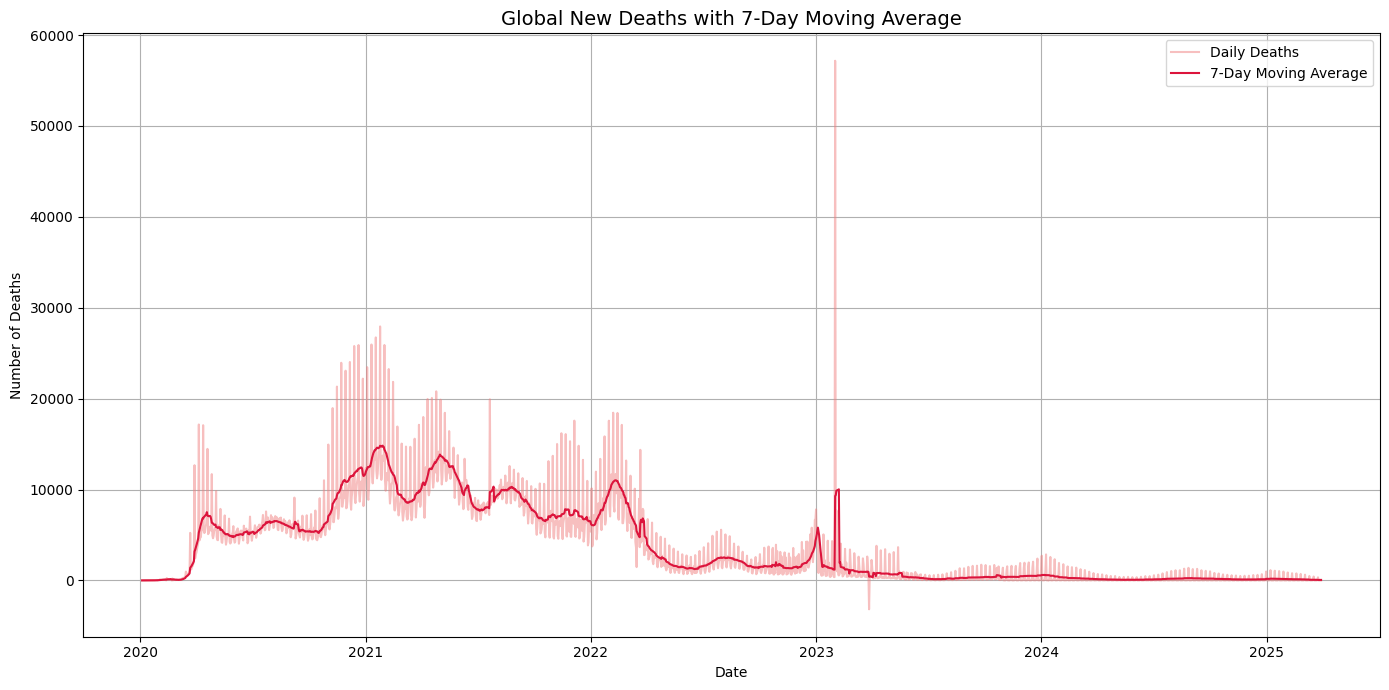

In [29]:
# plot
plt.figure(figsize=(14, 7))
plt.plot(global_trend['Date_reported'], global_trend['New_deaths'], label='Daily Deaths', color='lightcoral', alpha=0.5)
plt.plot(global_trend['Date_reported'], global_trend['7_day_avg'], label='7-Day Moving Average', color='crimson')
plt.title("Global New Deaths with 7-Day Moving Average", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 📆 Step 12: Day-of-Week Death Analysis

In [30]:
# extract the day of week
df['Day_of_week'] = df['Date_reported'].dt.day_name()
df

Date_reported          Country WHO_region  New_cases  Cumulative_cases  \
2         2020-01-04       Bangladesh       SEAR        0.0                 0   
8         2020-01-04     Cook Islands        WPR        0.0                 0   
15        2020-01-04            India       SEAR        0.0                 0   
22        2020-01-04            Nauru        WPR        0.0                 0   
28        2020-01-04  Solomon Islands        WPR        0.0                 0   
...              ...              ...        ...        ...               ...   
458104    2025-03-26            China        WPR        0.0          99381761   
458206    2025-03-27            China        WPR        0.0          99381761   
458583    2025-03-28            China        WPR        0.0          99381761   
458687    2025-03-29            China        WPR        0.0          99381761   
459063    2025-03-30            China        WPR        0.0          99381761   

        New_deaths  Cumulative_deaths Day_of_week  
2              0.0                  0    Saturday  
8              0.0                  0    Saturday  
15             0.0                  0    Saturday  
22             0.0                  0    Saturday  
28             0.0                  0    Saturday  
...            ...                ...         ...  
458104         0.0             122398   Wednesday  
458206         0.0             122398    Thursday  
458583         0.0             122398      Friday  
458687         0.0             122398    Saturday  
459063         0.0             122398      Sunday  

[209312 rows x 8 columns]

In [31]:
dow_avg = df.groupby('Day_of_week')['New_deaths'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
dow_avg

Day_of_week
Monday       25.406776
Tuesday      27.684029
Wednesday    31.108655
Thursday     33.001995
Friday       35.055443
Saturday     32.930361
Sunday       51.913304
Name: New_deaths, dtype: float64

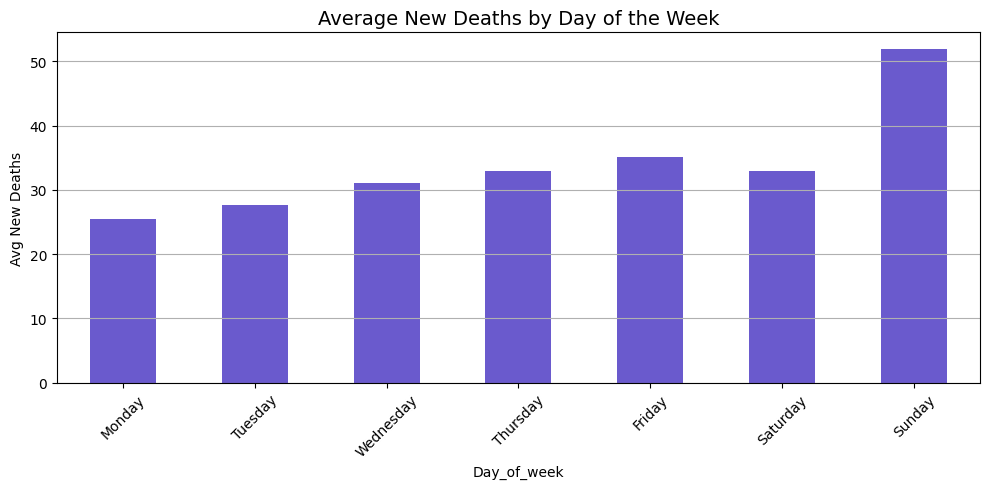

In [32]:
# plot
plt.figure(figsize=(10, 5))
dow_avg.plot(kind='bar', color='slateblue')
plt.title("Average New Deaths by Day of the Week", fontsize=14)
plt.ylabel("Avg New Deaths")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 📦 Step 13: Correlation Heatmap

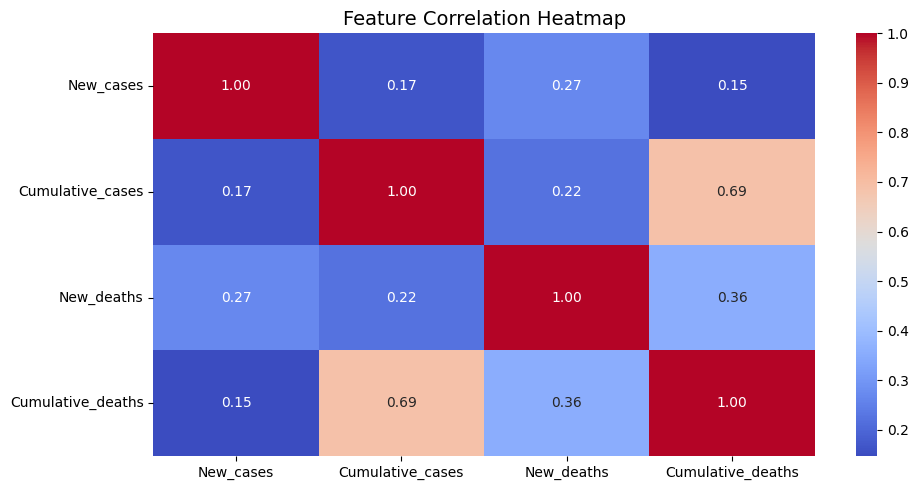

In [33]:
# plot
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

### 🚐 Step 14: Boxplot of New Deaths by Region

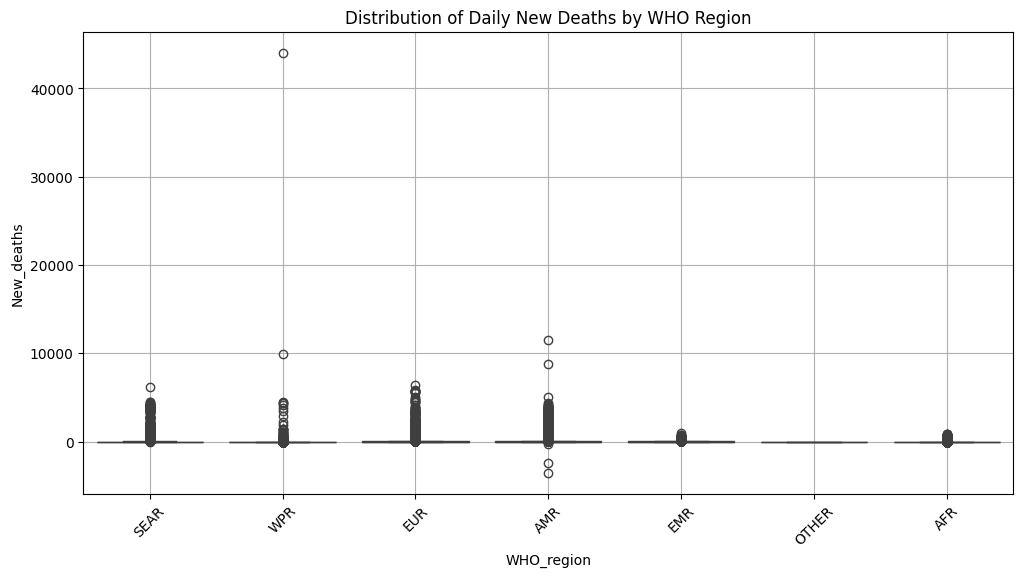

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='WHO_region', y='New_deaths')
plt.xticks(rotation=45)
plt.title('Distribution of Daily New Deaths by WHO Region')
plt.grid(True)
plt.show()

## 🤖 LINEAR REGRESSION

### ✅ Step 1: Select Features + Target

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# feature and target selection
features = ['New_cases', 'Cumulative_cases', 'Cumulative_deaths']
target = 'New_deaths'

X = df[features]
y = df[target]

### ✅ Step 2: Train-Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ✅ Step 3: Train Linear Regression

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### ✅ Step 4: Evaluate the Model

In [38]:
# predict 
y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📏 Mean Squared Error (MSE): {mse:.2f}")
print(f"📈 R-squared (R²): {r2:.2f}")

📏 Mean Squared Error (MSE): 30153.19
📈 R-squared (R²): 0.19


From above it is clearly visible that only 19% of the accuracy is achieved, which is too low , so we need to improve this or else use another ML algo/model.

### ✅ Step 5: Visualize Actual vs Predicted

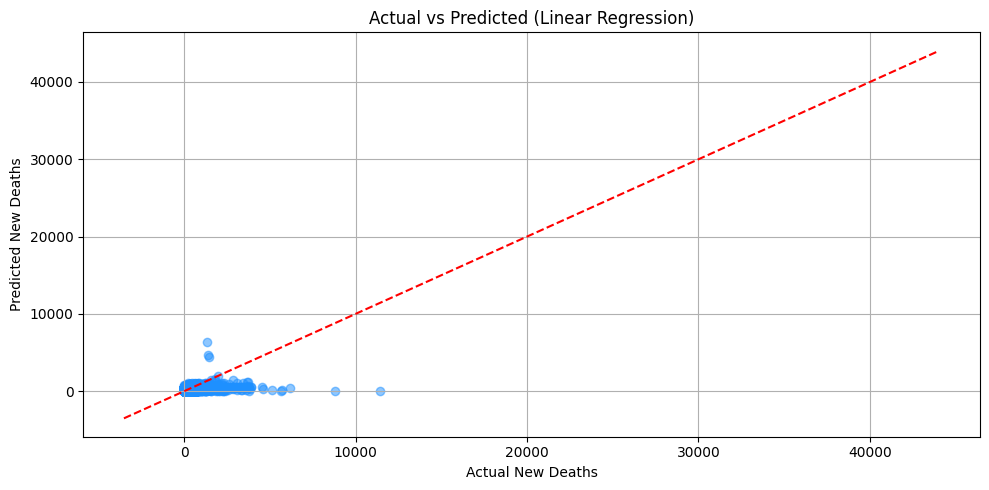

In [39]:
# plot
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.5, color='dodgerblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Actual New Deaths")
plt.ylabel("Predicted New Deaths")
plt.title("Actual vs Predicted (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

### ✅ Step 6: Improve it - Add new features 

In [40]:
# ✅ Step 1: Add "Days Since Start" Feature

# sort the data by date
df = df.sort_values(by='Date_reported')

# create a new column for days since the start of the dataset
df['Days_since_start'] = (df['Date_reported'] - df['Date_reported'].min()).dt.days
df

Date_reported     Country WHO_region  New_cases  Cumulative_cases  \
2         2020-01-04  Bangladesh       SEAR        0.0                 0   
122       2020-01-04   Singapore        WPR        0.0                 0   
124       2020-01-04     Tokelau        WPR        0.0                 0   
133       2020-01-04     Germany        EUR        1.0                 1   
145       2020-01-04    Malaysia        WPR        0.0                 0   
...              ...         ...        ...        ...               ...   
458104    2025-03-26       China        WPR        0.0          99381761   
458206    2025-03-27       China        WPR        0.0          99381761   
458583    2025-03-28       China        WPR        0.0          99381761   
458687    2025-03-29       China        WPR        0.0          99381761   
459063    2025-03-30       China        WPR        0.0          99381761   

        New_deaths  Cumulative_deaths Day_of_week  Days_since_start  
2              0.0                  0    Saturday                 0  
122            0.0                  0    Saturday                 0  
124            0.0                  0    Saturday                 0  
133            0.0                  0    Saturday                 0  
145            0.0                  0    Saturday                 0  
...            ...                ...         ...               ...  
458104         0.0             122398   Wednesday              1908  
458206         0.0             122398    Thursday              1909  
458583         0.0             122398      Friday              1910  
458687         0.0             122398    Saturday              1911  
459063         0.0             122398      Sunday              1912  

[209312 rows x 9 columns]

In [41]:
# ✅ Step 2: Add Rolling Averages

# 7-day rolling average for deaths & cases
df["New_deaths_7day_avg"] = df["New_deaths"].rolling(window=7, min_periods=1).mean()
df["New_cases_7day_avg"] = df["New_cases"].rolling(window=7, min_periods=1).mean()

# 14-day rolling average for longer trends
df["New_deaths_14day_avg"] = df["New_deaths"].rolling(window=14, min_periods=1).mean()
df["New_cases_14day_avg"] = df["New_cases"].rolling(window=14, min_periods=1).mean()

df

Date_reported     Country WHO_region  New_cases  Cumulative_cases  \
2         2020-01-04  Bangladesh       SEAR        0.0                 0   
122       2020-01-04   Singapore        WPR        0.0                 0   
124       2020-01-04     Tokelau        WPR        0.0                 0   
133       2020-01-04     Germany        EUR        1.0                 1   
145       2020-01-04    Malaysia        WPR        0.0                 0   
...              ...         ...        ...        ...               ...   
458104    2025-03-26       China        WPR        0.0          99381761   
458206    2025-03-27       China        WPR        0.0          99381761   
458583    2025-03-28       China        WPR        0.0          99381761   
458687    2025-03-29       China        WPR        0.0          99381761   
459063    2025-03-30       China        WPR        0.0          99381761   

        New_deaths  Cumulative_deaths Day_of_week  Days_since_start  \
2              0.0                  0    Saturday                 0   
122            0.0                  0    Saturday                 0   
124            0.0                  0    Saturday                 0   
133            0.0                  0    Saturday                 0   
145            0.0                  0    Saturday                 0   
...            ...                ...         ...               ...   
458104         0.0             122398   Wednesday              1908   
458206         0.0             122398    Thursday              1909   
458583         0.0             122398      Friday              1910   
458687         0.0             122398    Saturday              1911   
459063         0.0             122398      Sunday              1912   

        New_deaths_7day_avg  New_cases_7day_avg  New_deaths_14day_avg  \
2                       0.0            0.000000                   0.0   
122                     0.0            0.000000                   0.0   
124                     0.0            0.000000                   0.0   
133                     0.0            0.250000                   0.0   
145                     0.0            0.200000                   0.0   
...                     ...                 ...                   ...   
458104                  0.0           37.857143                  24.0   
458206                  0.0            1.285714                   0.0   
458583                  0.0            1.285714                   0.0   
458687                  0.0            1.000000                   0.0   
459063                  0.0            1.000000                   0.0   

        New_cases_14day_avg  
2                  0.000000  
122                0.000000  
124                0.000000  
133                0.250000  
145                0.200000  
...                     ...  
458104            25.142857  
458206            25.142857  
458583            20.071429  
458687            20.071429  
459063            20.071429  

[209312 rows x 13 columns]

In [42]:
# ✅ Step 3: Add Death Rate & Case Growth Rate

import numpy as np

# Avoid division by zero using .replace(0, np.nan) first
df["Death_rate"] = (df["Cumulative_deaths"] / df["Cumulative_cases"]).replace([np.inf, -np.inf], np.nan).fillna(0)
df["Case_growth_rate"] = df["New_cases"] / df["Cumulative_cases"].replace(0, np.nan)

df

Date_reported     Country WHO_region  New_cases  Cumulative_cases  \
2         2020-01-04  Bangladesh       SEAR        0.0                 0   
122       2020-01-04   Singapore        WPR        0.0                 0   
124       2020-01-04     Tokelau        WPR        0.0                 0   
133       2020-01-04     Germany        EUR        1.0                 1   
145       2020-01-04    Malaysia        WPR        0.0                 0   
...              ...         ...        ...        ...               ...   
458104    2025-03-26       China        WPR        0.0          99381761   
458206    2025-03-27       China        WPR        0.0          99381761   
458583    2025-03-28       China        WPR        0.0          99381761   
458687    2025-03-29       China        WPR        0.0          99381761   
459063    2025-03-30       China        WPR        0.0          99381761   

        New_deaths  Cumulative_deaths Day_of_week  Days_since_start  \
2              0.0                  0    Saturday                 0   
122            0.0                  0    Saturday                 0   
124            0.0                  0    Saturday                 0   
133            0.0                  0    Saturday                 0   
145            0.0                  0    Saturday                 0   
...            ...                ...         ...               ...   
458104         0.0             122398   Wednesday              1908   
458206         0.0             122398    Thursday              1909   
458583         0.0             122398      Friday              1910   
458687         0.0             122398    Saturday              1911   
459063         0.0             122398      Sunday              1912   

        New_deaths_7day_avg  New_cases_7day_avg  New_deaths_14day_avg  \
2                       0.0            0.000000                   0.0   
122                     0.0            0.000000                   0.0   
124                     0.0            0.000000                   0.0   
133                     0.0            0.250000                   0.0   
145                     0.0            0.200000                   0.0   
...                     ...                 ...                   ...   
458104                  0.0           37.857143                  24.0   
458206                  0.0            1.285714                   0.0   
458583                  0.0            1.285714                   0.0   
458687                  0.0            1.000000                   0.0   
459063                  0.0            1.000000                   0.0   

        New_cases_14day_avg  Death_rate  Case_growth_rate  
2                  0.000000    0.000000               NaN  
122                0.000000    0.000000               NaN  
124                0.000000    0.000000               NaN  
133                0.250000    0.000000               1.0  
145                0.200000    0.000000               NaN  
...                     ...         ...               ...  
458104            25.142857    0.001232               0.0  
458206            25.142857    0.001232               0.0  
458583            20.071429    0.001232               0.0  
458687            20.071429    0.001232               0.0  
459063            20.071429    0.001232               0.0  

[209312 rows x 15 columns]

In [43]:
# ✅ Step 4: clean data

df.isnull().sum()

Date_reported               0
Country                     0
WHO_region                  0
New_cases                   0
Cumulative_cases            0
New_deaths                  0
Cumulative_deaths           0
Day_of_week                 0
Days_since_start            0
New_deaths_7day_avg         0
New_cases_7day_avg          0
New_deaths_14day_avg        0
New_cases_14day_avg         0
Death_rate                  0
Case_growth_rate        13046
dtype: int64

In [44]:
df['Case_growth_rate'] = df['Case_growth_rate'].fillna(0)
df

Date_reported     Country WHO_region  New_cases  Cumulative_cases  \
2         2020-01-04  Bangladesh       SEAR        0.0                 0   
122       2020-01-04   Singapore        WPR        0.0                 0   
124       2020-01-04     Tokelau        WPR        0.0                 0   
133       2020-01-04     Germany        EUR        1.0                 1   
145       2020-01-04    Malaysia        WPR        0.0                 0   
...              ...         ...        ...        ...               ...   
458104    2025-03-26       China        WPR        0.0          99381761   
458206    2025-03-27       China        WPR        0.0          99381761   
458583    2025-03-28       China        WPR        0.0          99381761   
458687    2025-03-29       China        WPR        0.0          99381761   
459063    2025-03-30       China        WPR        0.0          99381761   

        New_deaths  Cumulative_deaths Day_of_week  Days_since_start  \
2              0.0                  0    Saturday                 0   
122            0.0                  0    Saturday                 0   
124            0.0                  0    Saturday                 0   
133            0.0                  0    Saturday                 0   
145            0.0                  0    Saturday                 0   
...            ...                ...         ...               ...   
458104         0.0             122398   Wednesday              1908   
458206         0.0             122398    Thursday              1909   
458583         0.0             122398      Friday              1910   
458687         0.0             122398    Saturday              1911   
459063         0.0             122398      Sunday              1912   

        New_deaths_7day_avg  New_cases_7day_avg  New_deaths_14day_avg  \
2                       0.0            0.000000                   0.0   
122                     0.0            0.000000                   0.0   
124                     0.0            0.000000                   0.0   
133                     0.0            0.250000                   0.0   
145                     0.0            0.200000                   0.0   
...                     ...                 ...                   ...   
458104                  0.0           37.857143                  24.0   
458206                  0.0            1.285714                   0.0   
458583                  0.0            1.285714                   0.0   
458687                  0.0            1.000000                   0.0   
459063                  0.0            1.000000                   0.0   

        New_cases_14day_avg  Death_rate  Case_growth_rate  
2                  0.000000    0.000000               0.0  
122                0.000000    0.000000               0.0  
124                0.000000    0.000000               0.0  
133                0.250000    0.000000               1.0  
145                0.200000    0.000000               0.0  
...                     ...         ...               ...  
458104            25.142857    0.001232               0.0  
458206            25.142857    0.001232               0.0  
458583            20.071429    0.001232               0.0  
458687            20.071429    0.001232               0.0  
459063            20.071429    0.001232               0.0  

[209312 rows x 15 columns]

In [45]:
df.isnull().sum()

Date_reported           0
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
Day_of_week             0
Days_since_start        0
New_deaths_7day_avg     0
New_cases_7day_avg      0
New_deaths_14day_avg    0
New_cases_14day_avg     0
Death_rate              0
Case_growth_rate        0
dtype: int64

In [46]:
# ✅ Step 5: update and define features / target

features = ['New_cases', 'Cumulative_cases', 'Cumulative_deaths', 'Days_since_start', 
            'New_deaths_7day_avg', 'New_deaths_14day_avg', 'Death_rate', 'Case_growth_rate']

X = df[features]
y = df['New_deaths']

In [47]:
# ✅ Re-Train Linear Regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train again
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📏 New MSE: {mse:.2f}")
print(f"📈 New R² Score: {r2:.2f}")

📏 New MSE: 24215.16
📈 New R² Score: 0.36


The accuracy improved but still its too low for a predictive model. So, lets jump to non-linear model as our dataset have non linear relationships.

## 🌳 Next Model: Decision Tree Regressor

### ✅ Step 1: Import and Initialize

In [48]:
from sklearn.tree import DecisionTreeRegressor

# initialize the model
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)

### ✅ Step 2: Train the Model

In [49]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

### ✅ Step 3: Predict & Evaluate

In [50]:
y_pred_tree = tree_model.predict(X_test)

# Metrics
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"🌳 Decision Tree MSE: {mse_tree:.2f}")
print(f"🌳 Decision Tree R² Score: {r2_tree:.2f}")

🌳 Decision Tree MSE: 3392.25
🌳 Decision Tree R² Score: 0.91


### 🧠 Bonus: Visualize the Tree

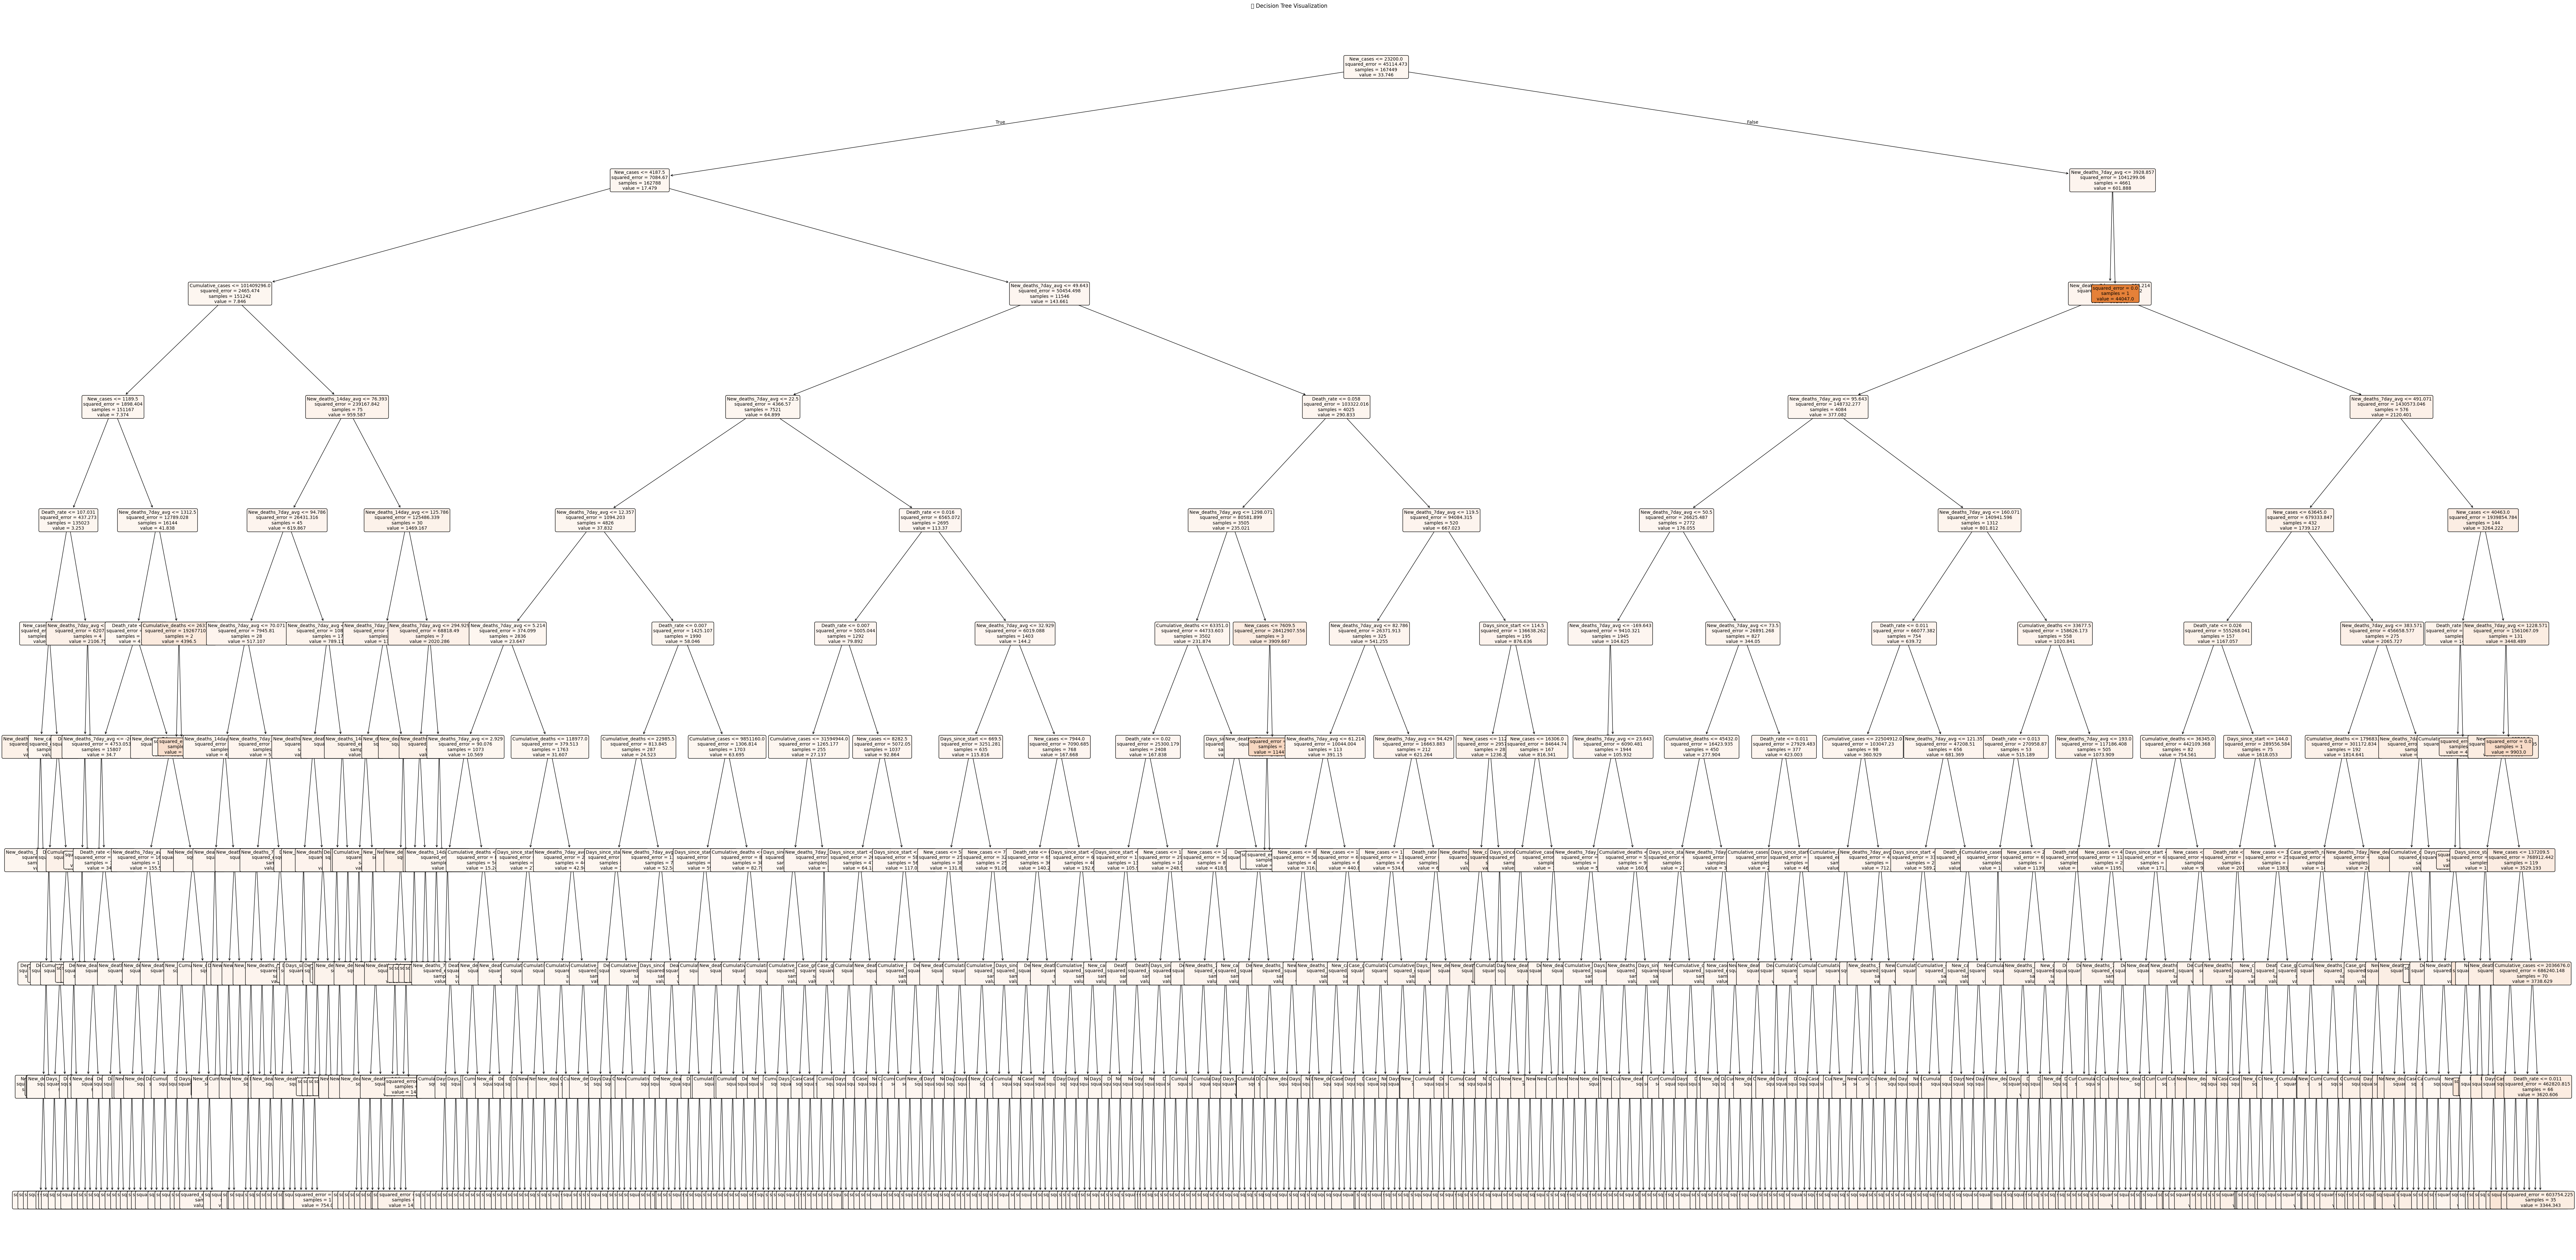

In [60]:
from sklearn.tree import plot_tree
plt.figure(figsize=(100, 50))
plot_tree(tree_model, feature_names=features, filled=True, fontsize=10, rounded=True)
plt.title("🌳 Decision Tree Visualization")
plt.show()

## 🌲 Random Forest Regressor

### ✅ Step 1: Import & Initialize

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)


### ✅ Step 2: Train the Model

In [53]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

### ✅ Step 3: Predict & Evaluate

In [54]:
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"🌲 Random Forest MSE: {mse_rf:.2f}")
print(f"🌲 Random Forest R² Score: {r2_rf:.2f}")

🌲 Random Forest MSE: 2140.63
🌲 Random Forest R² Score: 0.94


### 🌟 Step 4: Feature Importance Plot

/var/folders/k9/m0l3q5k92tz9rgxtl6c2rghm0000gn/T/ipykernel_82914/370234569.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Feature', y='Importance', palette='viridis')


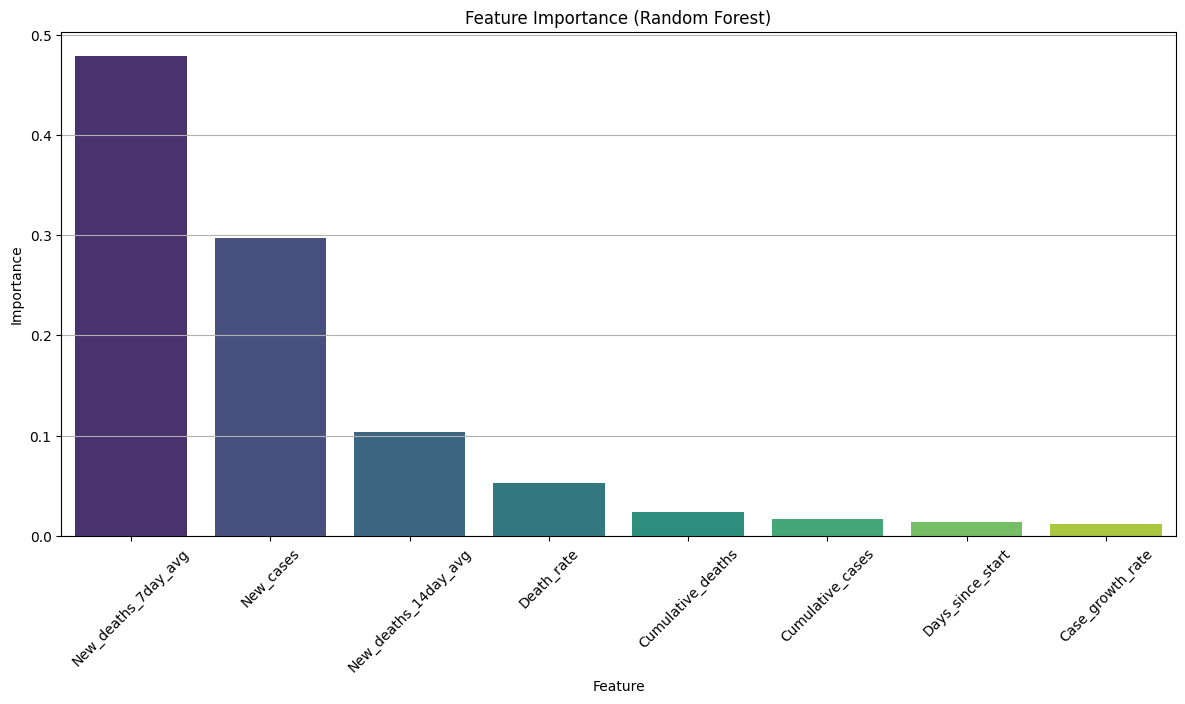

In [61]:
# Get feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance_df, x='Feature', y='Importance', palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

In [56]:
import joblib

joblib.dump(rf_model, "rf_model.pkl")

['rf_model.pkl']

In [57]:
try22 = [500, 12000, 450, 210, 28.5, 27.1, 3.5, 0.045]
try22 = np.array(try22).reshape(1, -1)
ytry = rf_model.predict(try22)
ytry[0]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


45.553399014545015